## Introduction
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Solving this case study will give an idea about how real business problems are solved using EDA and Machine Learning. In this case study, it's helpful to develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### About Dataset

Loan issued on march 2017

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. 

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from IPython.display import clear_output

Load Data from CSV file

In [274]:
df1 = pd.read_csv("LoanStats_2017Q1_2.csv", low_memory= False, skiprows=1)
df1.dataframeName = 'LoanStats_2017Q1_2.csv'


In [275]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
df1.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
count,0.0,96779.000000,96779.000000,96779.000000,96779.000000,9.677900e+04,0.0,0.0,96779.000000,96779.000000,...,1025.000000,1025.00000,1025.000000,1025.000000,1019.000000,1025.000000,1025.000000,1025.000000,1025.000000,356.000000
mean,NaN,14858.279947,14858.279947,14853.928022,450.885696,8.276104e+04,NaN,NaN,22.107865,0.349642,...,28634.799024,0.65561,1.721951,11.600000,59.096271,2.901463,13.268293,0.021463,0.064390,38.797753
std,NaN,9396.273231,9396.273231,9393.128515,283.501239,2.149442e+05,NaN,NaN,185.235747,0.929675,...,20339.923227,0.99286,1.841300,6.303521,24.207683,3.260956,8.477637,0.180947,0.268369,23.545068
min,NaN,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,NaN,NaN,-1.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,7800.000000,7800.000000,7800.000000,244.300000,4.900000e+04,NaN,NaN,12.240000,0.000000,...,14384.000000,0.00000,0.000000,7.000000,41.700000,1.000000,7.000000,0.000000,0.000000,18.000000
50%,NaN,12000.000000,12000.000000,12000.000000,372.710000,7.000000e+04,NaN,NaN,17.990000,0.000000,...,23848.000000,0.00000,1.000000,11.000000,61.200000,2.000000,12.000000,0.000000,0.000000,38.000000
75%,NaN,20000.000000,20000.000000,20000.000000,602.300000,9.950000e+04,NaN,NaN,24.350000,0.000000,...,36388.000000,1.00000,3.000000,15.000000,78.550000,4.000000,17.000000,0.000000,0.000000,57.000000
max,NaN,40000.000000,40000.000000,40000.000000,1715.420000,6.100000e+07,NaN,NaN,9999.000000,21.000000,...,170412.000000,6.00000,15.000000,46.000000,106.800000,28.000000,90.000000,4.000000,2.000000,105.000000


In [277]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head()

There are 96781 rows and 122 columns


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Manipulation
There are in total 96783 rows & 116 columns in the dataset, so creating a function to drop columns that have NaN Values over a threshold makes sense

In [278]:
##Creating a function to eliminate columns having more than 50% missing values

def dropnacolrow(df,val=1,percent=50):
    '''
    df is the dataframe that needs to be manipulated
    val :val = 0 represents drop rows , val =1 represents drop column (default value is 1 for column manipulation)
    percent is the total percentage value that will be used as threshold to see how much % of NaN values are there in the column
    '''
    
    df_newp = df.copy()
    
    if val == 1:
        columns_NA_percent = 100*df_newp.isnull().sum()/len(df_newp.index)
        list_NA_columns = list(columns_NA_percent[(columns_NA_percent> percent)].index)
        df_newp.drop(list_NA_columns, axis=1, inplace=True)
        print("Total number of dropped columns (with more than 50% missing values):",len(list_NA_columns))
        print("\nDropped column names are as follows:",list_NA_columns)
    else:
        rows_NA_percent = 100*df_newp.isnull().sum(axis=1)/len(df_newp.index)
        list_NA_rows = list(rows_NA_percent[(rows_NA_percent> percent)].index)
        df_newp.drop(list_NA_rows, axis=0, inplace=True)
        print("Total number of dropped rows (with more than 50% missing values):",len(list_NA_rows))
        print("\nDropped row names are as follows:",list_NA_rows)
        
    return df_newp

In [279]:
##Retaining the columns with <=50% missing values
df1 = dropnacolrow(df1,val=1,percent=50)

Total number of dropped columns (with more than 50% missing values): 22

Dropped column names are as follows: ['id', 'member_id', 'url', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_il_6m', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']


In [280]:
##Retaining the rows with <=50% missing values
df1 = dropnacolrow(df1,val=0,percent=50)

Total number of dropped rows (with more than 50% missing values): 0

Dropped row names are as follows: []


In [281]:
df1.shape

(96781, 100)

In [282]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,Code/Compliance Inspector,10+ years,...,0.0,6.0,100.0,0.0,1.0,0.0,93599.0,36506.0,9000.0,55699.0
1,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,Senior Superintendent,10+ years,...,0.0,0.0,100.0,66.7,0.0,0.0,148572.0,69364.0,60300.0,30224.0
2,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,IT Tech,8 years,...,0.0,5.0,100.0,14.3,0.0,0.0,205671.0,51591.0,36100.0,36876.0
3,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,Dental hygienist,2 years,...,0.0,1.0,87.5,100.0,0.0,0.0,152852.0,136208.0,2500.0,139652.0
4,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,Program Manager,3 years,...,0.0,3.0,59.1,20.0,0.0,0.0,72865.0,60622.0,23200.0,49665.0


In [283]:
##Creating a function to remove single value unique columns from the dataframe
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    return df_newsingle

In [284]:
##Removing single value unique columns from the dataframe
df1 = remove_single_val_uniq_col(df1)
df1.shape

(96781, 96)

In [285]:
##Removing duplicate rows (if any)
df1 = df1.drop_duplicates()
df1.shape

(96780, 96)

In [286]:
##Checking 'zip_code' column
df1.zip_code.head()

0    467xx
1    064xx
2    454xx
3    768xx
4    981xx
Name: zip_code, dtype: object

In [287]:
##List of additional columns to be dropped as they aren't of much use for our analysis
drop_list = ['zip_code','delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util',\
              'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
              'total_rec_prncp','total_rec_int','total_rec_late_fee','bc_open_to_buy',\
              'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','next_pymnt_d','mths_since_rcnt_il',\
              'mo_sin_old_il_acct','num_tl_120dpd_2m','percent_bc_gt_75','mths_since_last_delinq','il_util',\
              'bc_util','mths_since_recent_bc','mths_since_recent_inq','mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', \
             'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', \
             'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', \
             'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', \
             'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',\
             'total_il_high_credit_limit','emp_title','all_util', 'funded_amnt', 'funded_amnt_inv']

df1.drop(drop_list, axis = 1,inplace = True)

<ipython-input-287-42c27546e6f8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(drop_list, axis = 1,inplace = True)


In [288]:
#Checking % of NaNs in columns (>0)
missing_val_cols_prcnt = round(100*df1.isnull().sum()/len(df1.index),4)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

loan_amnt                     0.001
term                          0.001
int_rate                      0.001
installment                   0.001
grade                         0.001
sub_grade                     0.001
emp_length                    7.019
home_ownership                0.001
annual_inc                    0.001
verification_status           0.001
issue_d                       0.001
loan_status                   0.001
purpose                       0.001
title                         0.001
addr_state                    0.001
dti                           0.001
earliest_cr_line              0.001
pub_rec                       0.001
initial_list_status           0.001
collections_12_mths_ex_med    0.001
application_type              0.001
acc_now_delinq                0.001
tot_coll_amt                  0.001
tot_cur_bal                   0.001
open_acc_6m                   0.001
open_il_6m                    0.001
open_il_12m                   0.001
open_il_24m                 

In [289]:
##Since the %of NanNs in 'title' column are very small. Dropping the rows with null values in these columns
df1 = df1[~(df1.title.isnull())]
missing_val_cols_prcnt = round(100*df1.isnull().sum()/len(df1.index),4)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_length    7.0181
dtype: float64

In [290]:
##Checking unique entries in pub_rec_bankruptcies
print(df1.pub_rec_bankruptcies.unique())
print(df1.pub_rec_bankruptcies.dtype)

[1. 0. 2. 4. 3. 5. 6. 7.]
float64


In [291]:
##Percentage of unique values in 'pub_rec_bankruptcies' column
df1.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(3)

0.0    86.786
1.0    12.282
2.0     0.710
3.0     0.159
4.0     0.041
5.0     0.018
6.0     0.003
7.0     0.001
Name: pub_rec_bankruptcies, dtype: float64

In [292]:
##Check 'emp_length' column
df1.emp_length.unique()

array(['10+ years', '8 years', '2 years', '3 years', '1 year', '9 years',
       '4 years', '6 years', '5 years', nan, '< 1 year', '7 years'],
      dtype=object)

In [293]:
df1.emp_length = df1.emp_length.replace('10+ years', 10)
df1.emp_length = df1.emp_length.replace('9 years', 9)
df1.emp_length = df1.emp_length.replace('8 years', 8)
df1.emp_length = df1.emp_length.replace('7 years', 7)
df1.emp_length = df1.emp_length.replace('6 years', 6)
df1.emp_length = df1.emp_length.replace('5 years', 5)
df1.emp_length = df1.emp_length.replace('4 years', 4)
df1.emp_length = df1.emp_length.replace('3 years', 3)
df1.emp_length = df1.emp_length.replace('2 years', 2)
df1.emp_length = df1.emp_length.replace('1 year', 1)
df1.emp_length = df1.emp_length.replace('< 1 year', 0)

In [294]:
df1.emp_length

0        10.0
1        10.0
2         8.0
3         2.0
4         3.0
         ... 
96774    10.0
96775     2.0
96776     NaN
96777     NaN
96778     1.0
Name: emp_length, Length: 96779, dtype: float64

In [295]:
df1.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [296]:
df1.term = df1.term.replace(' 36 months', 36)
df1.term = df1.term.replace(' 60 months', 60)

In [297]:
df1.int_rate=df1.int_rate.str.rstrip("%").astype(float)/100

Convert to date time object

In [298]:
df1['earliest_cr_line'].head()

0    Aug-1992
1    Sep-1989
2    Apr-2005
3    Apr-2003
4    Jul-2004
Name: earliest_cr_line, dtype: object

In [299]:
##Apart from the data, we also have 'earliest_cr_line' and 'issue_d' 'that hold datevalue.
###Converting 'earliest_cr_line' columns into a datetime datatype

df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'],format='%b-%Y')
df1['issue_d'] = pd.to_datetime(df1['issue_d'],format='%b-%Y')

In [300]:
df1.earliest_cr_line.max()


Timestamp('2014-02-01 00:00:00')

In [301]:
#Creating a function for lowercase and uppercase strings and stripping off the blank spaces around entries
'''
lower_case string, c=1 (default)
upper_case string, c=0
df: dataframe to be manipulated
list_name: columns to be manipulated
'''
def case_function(df, list_name, c=1):
    df_case = df.copy()
    
    if c==1:
        for i in list_name:
            df_case[i] = df_case[i].str.strip()
            df_case[i] = df_case[i].str.lower()
    else:
        for i in list_name:
            df_case[i] = df_case[i].str.strip()
            df_case[i] = df_case[i].str.upper()
    return df_case

In [302]:
#Converting some columns to lowercase strings and stripping off blank spaces around the content
columns_lowcase = ['home_ownership','verification_status','loan_status','purpose','title']
df1 = case_function(df1, columns_lowcase, c=1)

#Converting some columns to uppercase strings throughout and stripping off blanks spaces around the content(if any)
columns_uppercase = ['grade','sub_grade','addr_state']
df1 = case_function(df1, columns_uppercase, c=0)
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,3600.0,36,0.0749,111.97,A,A4,10.0,mortgage,120000.0,not verified,...,1020.0,37900.0,3.0,1.0,4.0,13.0,2147.0,0.0,0.0,1.0
1,15000.0,60,0.1499,356.78,C,C4,10.0,mortgage,125000.0,not verified,...,15199.0,70600.0,1.0,0.0,0.0,4.0,8220.0,0.0,0.0,0.0
2,8400.0,36,0.1139,276.56,B,B3,8.0,mortgage,50000.0,source verified,...,5338.0,42300.0,4.0,1.0,7.0,10.0,12389.0,0.0,0.0,0.0
3,4000.0,36,0.1049,130.00,B,B2,2.0,rent,50000.0,source verified,...,2461.0,13200.0,0.0,0.0,1.0,6.0,13621.0,0.0,0.0,0.0
4,6000.0,36,0.0724,185.93,A,A3,3.0,rent,125000.0,source verified,...,6129.0,23200.0,1.0,1.0,1.0,4.0,3789.0,0.0,0.0,0.0


In [303]:
#Final check for null values in the dataframe
missing_val_cols_prcnt = round(100*df1.isnull().sum()/len(df1.index),2)
missing_val_cols_prcnt[missing_val_cols_prcnt!=0]

emp_length    7.02
dtype: float64

In [304]:
##df1 dataframe shape
df1.shape

(96779, 41)

In [305]:
df1.dtypes

loan_amnt                            float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
earliest_cr_line              datetime64[ns]
pub_rec                              float64
initial_list_status                   object
collections_12_mths_ex_med           float64
application_type                      object
acc_now_delinq                       float64
tot_coll_a

## Exploratory Data Analysis
Here on we shall be using the 'df1' dataframe as we have already created a copy of in the 'df0' dataframe

In [306]:
#Check 'loan_status' for value counts
df1.loan_status.value_counts()

current               78897
issued                15071
fully paid             2251
in grace period         330
late (31-120 days)      126
late (16-30 days)       104
Name: loan_status, dtype: int64

In [307]:
##Check 'loan_status' for % of value counts
df1.loan_status.value_counts(normalize=True).mul(100).round(2)

current               81.52
issued                15.57
fully paid             2.33
in grace period        0.34
late (31-120 days)     0.13
late (16-30 days)      0.11
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Distribution by loan amount')

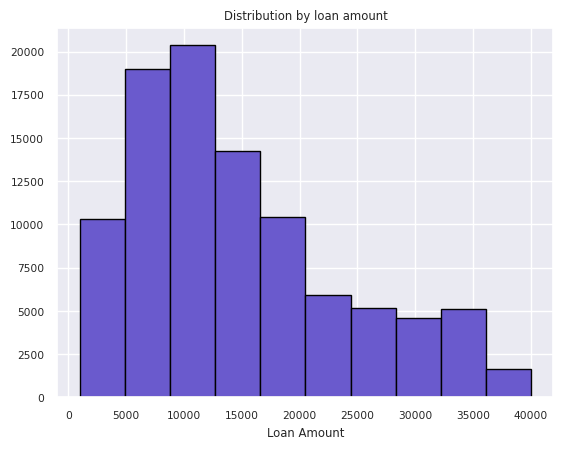

In [308]:
plt.hist(df1['loan_amnt'],color='slateblue', ec='black')
plt.xlabel('Loan Amount')
plt.title('Distribution by loan amount')

Text(0.5, 1.0, 'Distribution by Installment amount')

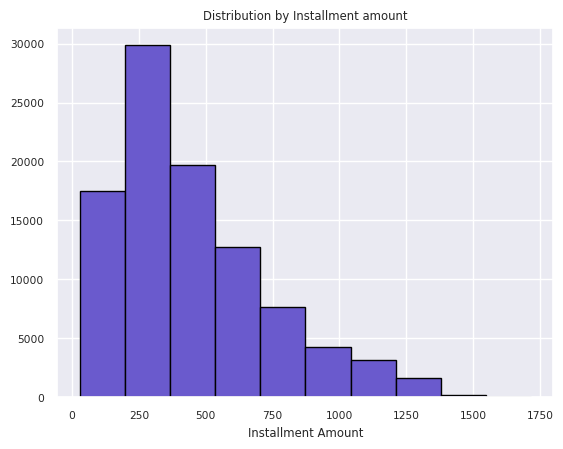

In [309]:
plt.hist(df1['installment'],color='slateblue', ec='black')
plt.xlabel('Installment Amount')
plt.title('Distribution by Installment amount')

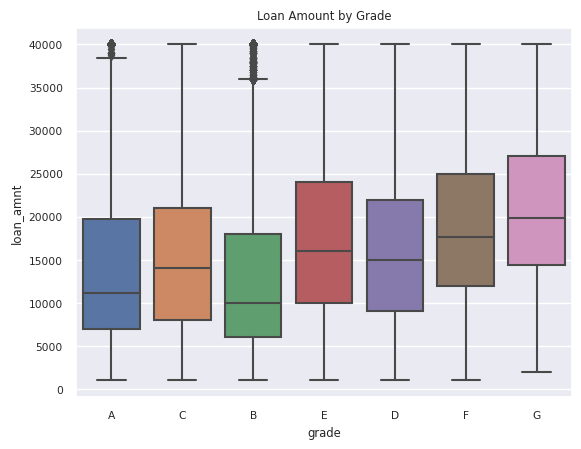

In [310]:
## load amount vs grade
sns.boxplot(x="grade", y="loan_amnt", data=df1)
plt.title('Loan Amount by Grade')
plt.show()

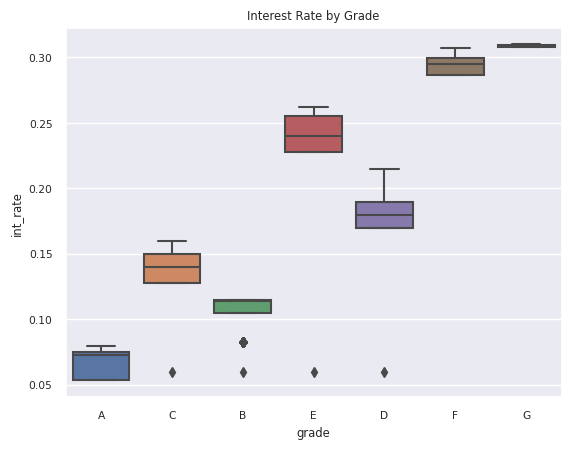

In [311]:
## interest rate vs grade
sns.boxplot(x="grade", y="int_rate", data=df1)
plt.title('Interest Rate by Grade')
plt.show()

## Feature cleaning and selection
Target feature (loan_status)

For the purpose of this project, problem loans are loans that have not been paid, and that have a been classified as:
Late, Grace period, Default, or Charged Off

In [312]:
# Removing fully current and issued
df1 = df1[df1.loan_status.str.contains('current')==False]
df1 = df1[df1.loan_status.str.contains('issued')==False]

# # Collapsing all but Fully Paid into Problem Loan
## df1.loan_status = df1.loan_status.replace(r'(^.*paid$)', 'Fully Paid')
# df1.loan_status = df1.loan_status.replace('issued', 'fully paid')
# df1.loan_status = df1.loan_status.replace('current', 'fully paid')
df1.loan_status = df1.loan_status.replace('in grace period', 'problem loan', regex=True)
df1.loan_status = df1.loan_status.replace('late (16-30 days)', 'problem loan')
df1.loan_status = df1.loan_status.replace('late (31-120 days)', 'problem loan')
df1.loan_status.unique()

array(['fully paid', 'problem loan'], dtype=object)

In [313]:
#Check 'loan_status' for value counts
df1.loan_status.value_counts()

fully paid      2251
problem loan     560
Name: loan_status, dtype: int64

In [314]:
df1.shape

(2811, 41)

#### Other features

Dropping columns with repetitive or non-relevant information
zip_code and addr_state have similar information - keeping addr_state

grade and sub_grade also have similar information - keeping grade

In [315]:
# Dropping sub_grade and initial list status
df1 = df1.drop(["sub_grade"], axis=1)
df1 = df1.drop(["initial_list_status"], axis=1)

In [316]:
print(df1.columns.tolist())

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'earliest_cr_line', 'pub_rec', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies']


In [317]:
df1['home_ownership'].value_counts()

mortgage    1354
rent        1033
own          409
any           15
Name: home_ownership, dtype: int64

In [318]:
df1['home_ownership'].replace(['none','any'],'other', inplace=True)

In [319]:
df1['home_ownership'].value_counts()

mortgage    1354
rent        1033
own          409
other         15
Name: home_ownership, dtype: int64

#### Convert non-numeric features

In [320]:
# Custom functiones needed later
def types_of_columns(df):
    # creates two separate dataframes 
    # one with float column names and the other with object column names
    non_num_cols = df.dtypes[df.dtypes == 'object']
    float_cols   = df.dtypes[df.dtypes != 'object']
    return non_num_cols, float_cols
    
def column_checker (df1, df2, num):
    # df1 dataframe whit the columns
    # df2 dataframe with colum names
    for col in range(0,len(df2)):
        col = df2.index[col]
        values = df1[col].unique()
        if len(values) > num:
           print('\n', col, '\n',len(values),'\n',values)

In [321]:
## Sorting the columns by type
col_types_original = types_of_columns(df1)

Non-numeric features

In [322]:
nn_col_list = col_types_original[0]
(nn_col_list)

grade                  object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
title                  object
addr_state             object
application_type       object
dtype: object

In [323]:
column_checker(df1, types_of_columns(df1)[0], 0)


 grade 
 7 
 ['C' 'B' 'D' 'A' 'E' 'F' 'G']

 home_ownership 
 4 
 ['own' 'rent' 'mortgage' 'other']

 verification_status 
 3 
 ['source verified' 'verified' 'not verified']

 loan_status 
 2 
 ['fully paid' 'problem loan']

 purpose 
 12 
 ['home_improvement' 'credit_card' 'medical' 'car' 'debt_consolidation'
 'other' 'vacation' 'moving' 'house' 'major_purchase' 'small_business'
 'renewable_energy']

 title 
 12 
 ['home improvement' 'credit card refinancing' 'medical expenses'
 'car financing' 'debt consolidation' 'other' 'vacation'
 'moving and relocation' 'home buying' 'major purchase' 'business'
 'green loan']

 addr_state 
 49 
 ['AZ' 'MN' 'NJ' 'FL' 'CA' 'TN' 'TX' 'PA' 'IL' 'NH' 'VA' 'HI' 'GA' 'MA'
 'MD' 'NY' 'MI' 'CT' 'CO' 'OH' 'KS' 'RI' 'IN' 'MO' 'WI' 'DE' 'NC' 'AL'
 'NE' 'KY' 'UT' 'LA' 'ND' 'OK' 'WA' 'AR' 'SC' 'OR' 'SD' 'NM' 'NV' 'MS'
 'DC' 'ID' 'VT' 'AK' 'WY' 'ME' 'MT']

 application_type 
 2 
 ['INDIVIDUAL' 'JOINT']


#### Correlation Plot

In [324]:
num_col_list = types_of_columns(df1)[1].index

cor_df = pd.DataFrame()
for i in range(0,len(num_col_list)):
    cor_df = pd.concat([cor_df, df1[num_col_list[i]]],axis=1)  

<Axes: >

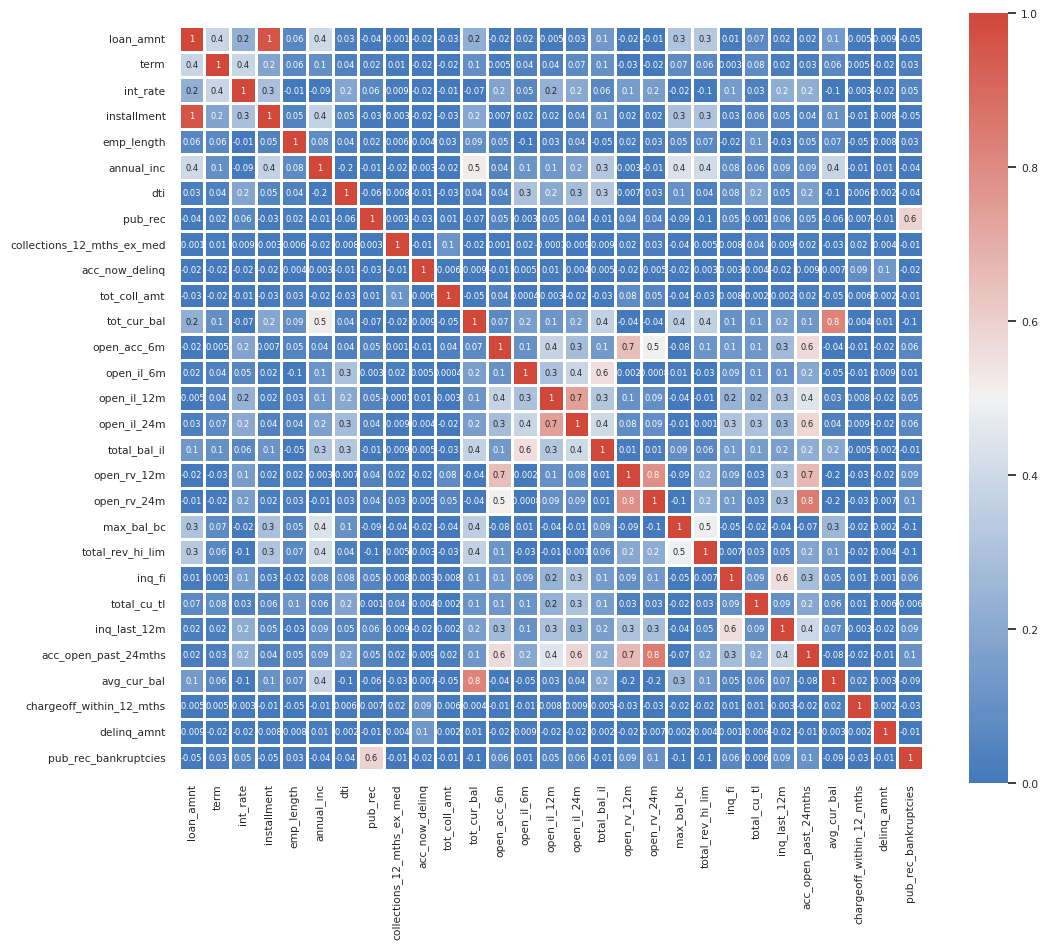

In [325]:
sns.set(font_scale=0.7)
f, ax = plt.subplots(figsize=(12, 10))
corr = cor_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(250, 15, as_cmap=True),
             square=True, ax=ax, annot=True, vmin=0, vmax=1, linewidths=2, xticklabels=1, yticklabels=True, annot_kws={"fontsize":6}, fmt='.1g')


**Observations**

1.   There is almost perfect correlation between 'loan_amnt' the 'installment' feature
2.   'acc_open_past_24mths' is correlated with 'open_rv_24m' and 'open_rv_12m'
3. 'avg_cur_bal' is correlated with 'tot_cur_bal'
4. 'open_acc_6m' is correlated with 'open_rv_12m'





In [326]:
nn_col_list

grade                  object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
title                  object
addr_state             object
application_type       object
dtype: object

In [327]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()

df1['grade']=l_encoder.fit_transform(df1['grade'])
df1['home_ownership']=l_encoder.fit_transform(df1['home_ownership'])
df1['verification_status']=l_encoder.fit_transform(df1['verification_status'])
df1['loan_status']=l_encoder.fit_transform(df1['loan_status'])
df1['purpose']=l_encoder.fit_transform(df1['purpose'])
df1['title']=l_encoder.fit_transform(df1['title'])
df1['addr_state']=l_encoder.fit_transform(df1['addr_state'])
df1['application_type']=l_encoder.fit_transform(df1['application_type'])

df1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
124,5000.0,36,0.1499,173.31,2,3.0,2,60000.0,1,2017-03-01,...,92.0,1000.0,3.0,0.0,2.0,3.0,35884.0,0.0,0.0,0.0
410,3000.0,36,0.1149,98.92,1,NaN,3,25000.0,1,2017-03-01,...,885.0,21300.0,5.0,0.0,7.0,6.0,710.0,0.0,0.0,2.0
712,25000.0,60,0.1899,648.38,3,2.0,0,80000.0,2,2017-03-01,...,5454.0,57400.0,2.0,0.0,9.0,10.0,20419.0,0.0,0.0,0.0
821,29225.0,36,0.1899,1071.13,3,10.0,3,85000.0,1,2017-03-01,...,0.0,4400.0,0.0,0.0,0.0,1.0,418.0,0.0,0.0,1.0
1038,12000.0,60,0.1274,271.45,2,NaN,0,90000.0,0,2017-03-01,...,4418.0,69200.0,2.0,0.0,2.0,8.0,1564.0,0.0,0.0,1.0


#### Convert date column to numeric

In [328]:
df1['earliest_cr_line'] = pd.to_numeric(df1['earliest_cr_line'])
df1['issue_d'] = pd.to_numeric(df1['issue_d'])

In [329]:
df1.shape

(2811, 39)

#### Replace nan in Emp_length

In [330]:
df1['emp_length'] = df1['emp_length'].fillna(0)

In [331]:
df1.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
earliest_cr_line              0
pub_rec                       0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_il_6m                    0
open_il_12m                   0
open_il_24m                   0
total_bal_il                  0
open_rv_12m                   0
open_rv_24m                   0
max_bal_bc                    0
total_rev_hi_lim              0
inq_fi  

📈 How numeric features correlate with the target variable?


In [332]:
!pip install -q hvplot

In [333]:
import hvplot.pandas
df1.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status)

**Conclusion:**

We notice that, there are broadly two types of features:

1. Features related to the applicant (demographic variables such as occupation, employment details etc.),
2. Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)


**Drop more features**


In [334]:
df1 = df1.drop(["emp_length"], axis=1)
df1 = df1.drop(["installment"], axis=1)
df1 = df1.drop(["earliest_cr_line"], axis=1)
df1 = df1.drop(["term"], axis=1)
df1 = df1.drop(["max_bal_bc"], axis=1)
df1 = df1.drop(["issue_d"], axis=1)
df1 = df1.drop(["open_il_6m"], axis=1)
df1 = df1.drop(["open_il_12m"], axis=1)
df1 = df1.drop(["open_rv_12m"], axis=1)

In [335]:
## loan_status
df1['loan_status'].value_counts()


0    2251
1     560
Name: loan_status, dtype: int64

In [336]:
df1.dtypes

loan_amnt                     float64
int_rate                      float64
grade                           int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
loan_status                     int64
purpose                         int64
title                           int64
addr_state                      int64
dti                           float64
pub_rec                       float64
collections_12_mths_ex_med    float64
application_type                int64
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
open_acc_6m                   float64
open_il_24m                   float64
total_bal_il                  float64
open_rv_24m                   float64
total_rev_hi_lim              float64
inq_fi                        float64
total_cu_tl                   float64
inq_last_12m                  float64
acc_open_past_24mths          float64
avg_cur_bal 

In [337]:
##Creating a 'df0' shallow copy of the 'df1' dataframe
df0  = df1.copy()

#### Imbalanced Dataset


In [338]:
df1.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,...,open_rv_24m,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
124,5000.0,0.1499,2,2,60000.0,1,0,3,6,3,...,1.0,1000.0,3.0,0.0,2.0,3.0,35884.0,0.0,0.0,0.0
410,3000.0,0.1149,1,3,25000.0,1,0,1,2,22,...,4.0,21300.0,5.0,0.0,7.0,6.0,710.0,0.0,0.0,2.0
712,25000.0,0.1899,3,0,80000.0,2,0,6,8,30,...,8.0,57400.0,2.0,0.0,9.0,10.0,20419.0,0.0,0.0,0.0
821,29225.0,0.1899,3,3,85000.0,1,0,0,1,9,...,1.0,4400.0,0.0,0.0,0.0,1.0,418.0,0.0,0.0,1.0
1038,12000.0,0.1274,2,0,90000.0,0,0,1,2,9,...,7.0,69200.0,2.0,0.0,2.0,8.0,1564.0,0.0,0.0,1.0


In [339]:
# Separate majority and minority classes
df_majority = df1[df1.iloc[:,6]==0]
df_minority = df1[df1.iloc[:,6]==1]

In [340]:
# Downsample majority class
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=2000)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=2000)
# Combine minority class with downsampled majority class
df1 = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [341]:
df1.loan_status.value_counts()

0    2000
1    2000
Name: loan_status, dtype: int64

In [342]:
df1.shape

(4000, 30)

### Building the model
#### Spliting the data for the model

Spliting into features and target

In [343]:
target = df1.loan_status.values
features = df1.drop(['loan_status'], axis=1).values
print ('Loans original data: %d, target: %d, features: %d' % (df1.shape[0], target.shape[0], features.shape[1]))

Loans original data: 4000, target: 4000, features: 29


#### Split data into training, valdation, and testing subsets

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [345]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

#### Neural Network

In [346]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

## Grid Search

In [347]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# # Define the hyperparameters to search
# param_grid = {
#     'batch_size': [32, 64],
#     'epochs': [50, 100],
#     'optimizer': ['adam', 'sgd'],
#     'dropout_rate': [0.2, 0.3],
#     'l2_reg': [0.00001, 0.0001],
#     'units': [256, 512],
#     'activation': ['relu']
# }

# scorers = {'accuracy': make_scorer(accuracy_score)}

# # Create the model to use in the GridSearchCV
# def create_model(units=512, activation='relu', dropout_rate=0.2, l2_reg=0.0001, optimizer='adam'):
#     model = Sequential()
#     model.add(Dense(units=units, activation=activation, kernel_regularizer=regularizers.l2(l2_reg), input_dim=df1.shape[1]-1))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units=units, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units=1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Define early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=3)

# # Create a KerasClassifier object
# keras_model = KerasClassifier(build_fn=create_model)


# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1, scoring=scorers, refit='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train, validation_data=(X_test, y_test),  callbacks=[early_stop])

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Accuracy: ", grid_search.best_score_)


## Best Parameters

In [348]:
opt = keras.optimizers.Adam(learning_rate=0.0005)

neural_classifier = Sequential()
# neural_classifier.add(Dense(units =  int(df1.shape[1]-1/2), kernel_initializer = 'HeUniform', activation = 'relu', input_dim = df1.shape[1]-1))
neural_classifier.add(Dense(units = 512, kernel_initializer = 'HeUniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.00001), input_dim = df1.shape[1]-1))
neural_classifier.add(Dropout(0.2))
neural_classifier.add(Dense(units = 512, kernel_initializer = 'HeUniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
neural_classifier.add(Dropout(0.2))
neural_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
neural_classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

neural_classifier.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               15360     
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 513       
                                                                 
Total params: 278,529
Trainable params: 278,529
Non-trainable params: 0
_________________________________________________________________


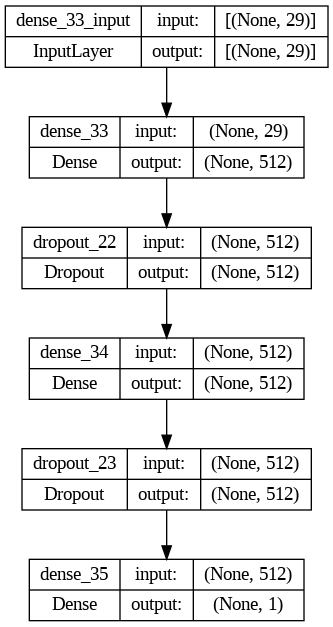

In [349]:
from keras.utils.vis_utils import plot_model
plot_model(neural_classifier, show_shapes=True, show_layer_names=True)

In [350]:
neural_classifier.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.0005,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

#### Fitting the model with the training set

In [351]:
# Training with training set
history=neural_classifier.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/50
96/96 [==============================] - 2s 10ms/step - loss: 0.6973 - accuracy: 0.5706 - val_loss: 0.6940 - val_accuracy: 0.5529
Epoch 2/50
96/96 [==============================] - 1s 8ms/step - loss: 0.6838 - accuracy: 0.5918 - val_loss: 0.7025 - val_accuracy: 0.5676
Epoch 3/50
96/96 [==============================] - 1s 10ms/step - loss: 0.6758 - accuracy: 0.6013 - val_loss: 0.6887 - val_accuracy: 0.5765
Epoch 4/50
96/96 [==============================] - 1s 9ms/step - loss: 0.6666 - accuracy: 0.6219 - val_loss: 0.6805 - val_accuracy: 0.5971
Epoch 5/50
96/96 [==============================] - 1s 8ms/step - loss: 0.6534 - accuracy: 0.6314 - val_loss: 0.6911 - val_accuracy: 0.5588
Epoch 6/50
96/96 [==============================] - 1s 10ms/step - loss: 0.6489 - accuracy: 0.6373 - val_loss: 0.6714 - val_accuracy: 0.6235
Epoch 7/50
96/96 [==============================] - 1s 14ms/step - loss: 0.6371 - accuracy: 0.6513 - val_loss: 0.6680 - val_accuracy: 0.6029
Epoch 8/50
96/96

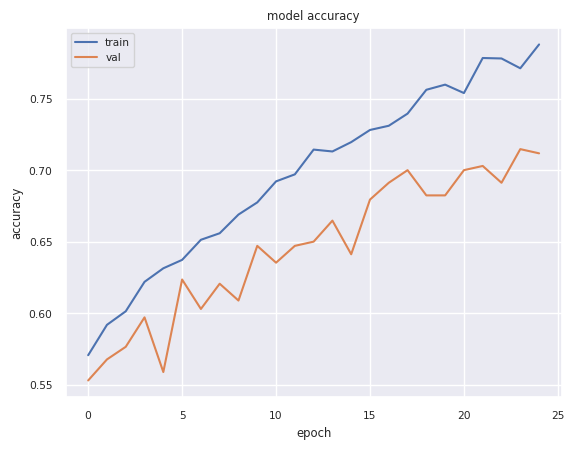

In [352]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

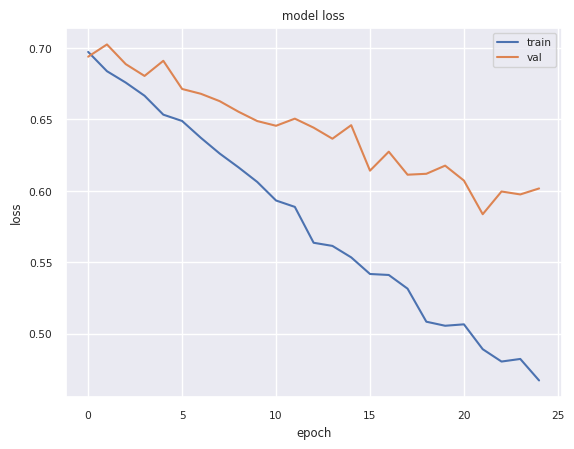

In [353]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### Save Trained Model

In [354]:
import pickle
filename1 ="trained_model.pkl"
filename2 ="scaler.pkl"
pickle.dump(neural_classifier, open(filename1, 'wb'))
pickle.dump(sc, open(filename2, 'wb'))

In [355]:
# Clear weights and history
neural_classifier.reset_states()

#### Crossvalidation with best parameters

In [356]:
# Crossvalidation on validation set
from keras.wrappers.scikit_learn import KerasClassifier # keras wrapper for sklearn
from sklearn.model_selection import cross_val_score

# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="training_loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


def build_classifier():
    opt = keras.optimizers.Adam(learning_rate=0.0005)
    classifier_cv = Sequential()
    classifier_cv.add(Dense(units = 512, kernel_initializer = 'HeUniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.00001), input_dim = df1.shape[1]-1))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 512, kernel_initializer = 'HeUniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.00001)))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier_cv.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    return classifier_cv

classifier_cv = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 50, callbacks=[early_stop], validation_data=(X_val, y_val))
accuracies = cross_val_score(estimator = classifier_cv, X = X_train, y = y_train, cv = 10)

mean = accuracies.mean()
variance = accuracies.std()

<ipython-input-356-71d3ce83e4c1>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_cv = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 50, callbacks=[early_stop], validation_data=(X_val, y_val))


Epoch 1/50
87/87 [==============================] - 3s 18ms/step - loss: 0.7044 - accuracy: 0.5512 - val_loss: 0.7020 - val_accuracy: 0.5588
Epoch 2/50
87/87 [==============================] - 1s 15ms/step - loss: 0.6858 - accuracy: 0.5861 - val_loss: 0.6833 - val_accuracy: 0.5882
Epoch 3/50
87/87 [==============================] - 1s 14ms/step - loss: 0.6730 - accuracy: 0.6042 - val_loss: 0.6829 - val_accuracy: 0.5941
Epoch 4/50
87/87 [==============================] - 1s 16ms/step - loss: 0.6637 - accuracy: 0.6166 - val_loss: 0.6730 - val_accuracy: 0.6000
Epoch 5/50
87/87 [==============================] - 1s 16ms/step - loss: 0.6548 - accuracy: 0.6336 - val_loss: 0.6700 - val_accuracy: 0.5941
Epoch 6/50
87/87 [==============================] - 1s 16ms/step - loss: 0.6483 - accuracy: 0.6412 - val_loss: 0.6628 - val_accuracy: 0.6029
Epoch 7/50
87/87 [==============================] - 1s 16ms/step - loss: 0.6369 - accuracy: 0.6489 - val_loss: 0.6515 - val_accuracy: 0.6324
Epoch 8/50
87

In [357]:
print('Mean cv accuracy = {:.4f}% +/- {:.4f}'.format(mean *100, variance *100) )

Mean cv accuracy = 74.2157% +/- 4.1141


#### Prediction

In [358]:
# Predicting on the test set 
y_pred = neural_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

19/19 [==============================] - 0s 4ms/step


In [359]:
# Accuracy on the test set
loss, accuracy = neural_classifier.evaluate(X_test, y_test,batch_size=128, verbose=0)
print("Accuracy = {:.4f}%, Loss = {:.4f}".format(accuracy* 100, loss))

Accuracy = 72.1667%, Loss = 0.5658


#### Confusion Matrix

[[179 130]
 [ 37 254]]


<Axes: >

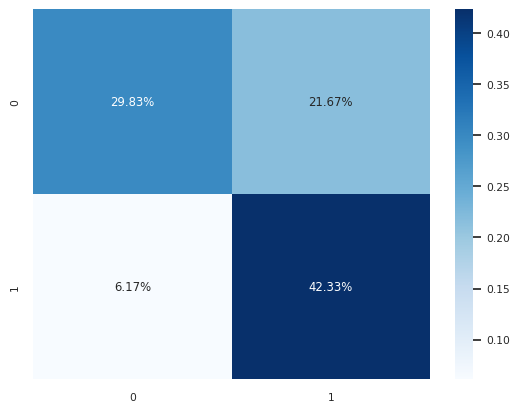

In [360]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### F1 Score

In [361]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.7525925925925926

## Bagging Classifier

In [362]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [363]:
model = BaggingClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=10)
# evaluate model
scores = cross_val_score(model, features, target, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print("Average cross-validation F1 score: {:.3f}".format(scores.mean()))

0.8966666666666666
Average cross-validation F1 score: 0.929


## Unsupervised Learning

In [364]:
df1.describe()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,...,open_rv_24m,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
count,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,14292.262500,0.156732,2.201250,1.437000,8.181476e+04,1.044750,0.500000,2.934000,4.044000,22.83025,...,3.062000,35156.465250,1.211500,1.83800,2.520500,5.168750,14283.713000,0.012750,50.425750,0.150250
std,9521.536856,0.059716,1.341901,1.388709,5.438031e+04,0.769022,0.500063,2.421076,2.617017,14.74048,...,2.727181,38103.222699,1.659203,2.93128,2.682886,3.483433,16708.258863,0.128808,1511.544113,0.400269
min,1000.000000,0.053200,0.000000,0.000000,9.600000e+03,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6181.250000,0.114900,1.000000,0.000000,4.850420e+04,0.000000,0.000000,2.000000,3.000000,9.00000,...,1.000000,14000.000000,0.000000,0.00000,1.000000,3.000000,3152.000000,0.000000,0.000000,0.000000
50%,12000.000000,0.139900,2.000000,2.000000,7.000000e+04,1.000000,0.500000,2.000000,3.000000,23.00000,...,2.000000,25700.000000,1.000000,1.00000,2.000000,4.000000,7866.000000,0.000000,0.000000,0.000000
75%,20000.000000,0.189900,3.000000,3.000000,1.000000e+05,2.000000,1.000000,3.000000,5.000000,34.00000,...,4.000000,43000.000000,2.000000,3.00000,4.000000,7.000000,19957.000000,0.000000,0.000000,0.000000
max,40000.000000,0.309900,6.000000,3.000000,1.100000e+06,2.000000,1.000000,11.000000,11.000000,48.00000,...,27.000000,451300.000000,14.000000,31.00000,23.000000,27.000000,172669.000000,2.000000,52201.000000,4.000000


In [365]:
df1.shape

(4000, 30)

In [366]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
from sklearn.cluster import KMeans
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10, n_init="auto")
  kmeans.fit(df1)
  wcss_values.append(kmeans.inertia_)

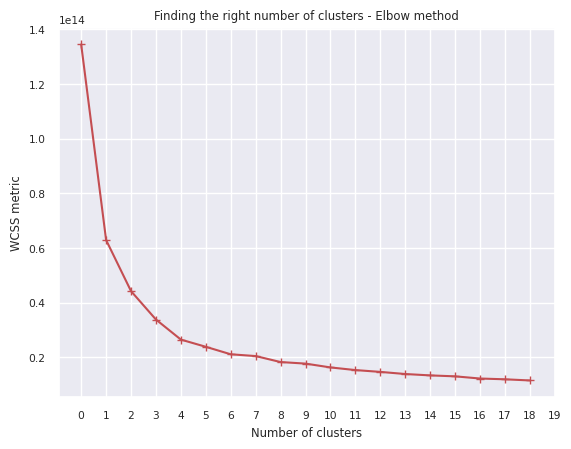

In [367]:
plt.plot(wcss_values,'r+-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()
# From this we can observe that, 3rd/4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 

Let's choose the number of clusters to be 6. Note that **scale starts with 0 which means we actually pick 7 clusters**

### Apply K-means Method

In [368]:
kmeans=KMeans(7, init='k-means++', random_state=1, n_init="auto")
kmeans.fit(df1)
kmeans.cluster_centers_.shape

(7, 30)

we have 7 centroids with 35 coordinates corresponding to each features of the dataset

In [369]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df0.columns])

In [370]:
labels = kmeans.labels_
labels

array([4, 4, 6, ..., 1, 6, 6], dtype=int32)

These are the cluster N° associated to each sample

In [371]:
set(labels)

{0, 1, 2, 3, 4, 5, 6}

In [372]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([df0, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,centroid
124,5000.0,0.1499,2.0,2.0,60000.0,1.0,0.0,3.0,6.0,3.0,...,1000.0,3.0,0.0,2.0,3.0,35884.0,0.0,0.0,0.0,6.0
410,3000.0,0.1149,1.0,3.0,25000.0,1.0,0.0,1.0,2.0,22.0,...,21300.0,5.0,0.0,7.0,6.0,710.0,0.0,0.0,2.0,4.0
712,25000.0,0.1899,3.0,0.0,80000.0,2.0,0.0,6.0,8.0,30.0,...,57400.0,2.0,0.0,9.0,10.0,20419.0,0.0,0.0,0.0,2.0
821,29225.0,0.1899,3.0,3.0,85000.0,1.0,0.0,0.0,1.0,9.0,...,4400.0,0.0,0.0,0.0,1.0,418.0,0.0,0.0,1.0,4.0
1038,12000.0,0.1274,2.0,0.0,90000.0,0.0,0.0,1.0,2.0,9.0,...,69200.0,2.0,0.0,2.0,8.0,1564.0,0.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


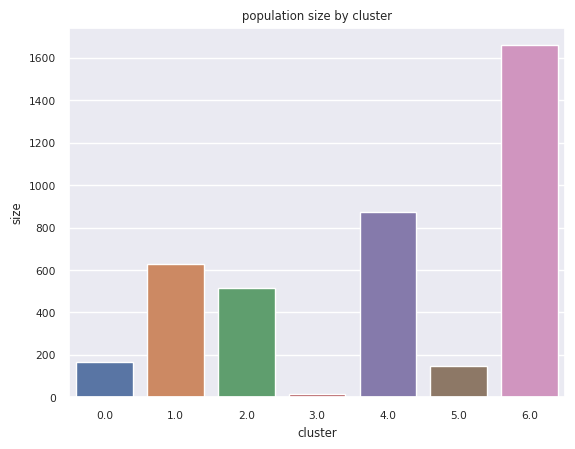

In [373]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

Clearly the two clusters 4 and 6 are extremely small and primarily represent some kind of exceptions. They may not constitute potential market segments within the current population largest cluster represent customer with good 'loan status'.

## Apply Principal Component Analysis and Visualize results

In [374]:
from sklearn.decomposition import PCA
# Obtain the principal components 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df0)
principal_components

array([[  18769.69256242,  -40250.95923749],
       [-158880.57440265,  -31936.05006583],
       [  69484.82442419,  -16861.38559264],
       ...,
       [  28701.73469824,  -44918.06858799],
       [  50203.23172822,   22567.59009695],
       [-116167.5721667 ,  -24062.8272698 ]])

In [375]:
# All samples projected on the two principal components
principal_components.shape

(2811, 2)

In [376]:

# Create a dataframe with the two components
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,18769.692562,-40250.959237
1,-158880.574403,-31936.050066
2,69484.824424,-16861.385593
3,-154607.292431,19087.595116
4,-115931.121774,36082.136151


In [377]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,18769.692562,-40250.959237,4
1,-158880.574403,-31936.050066,4
2,69484.824424,-16861.385593,6
3,-154607.292431,19087.595116,4
4,-115931.121774,36082.136151,1


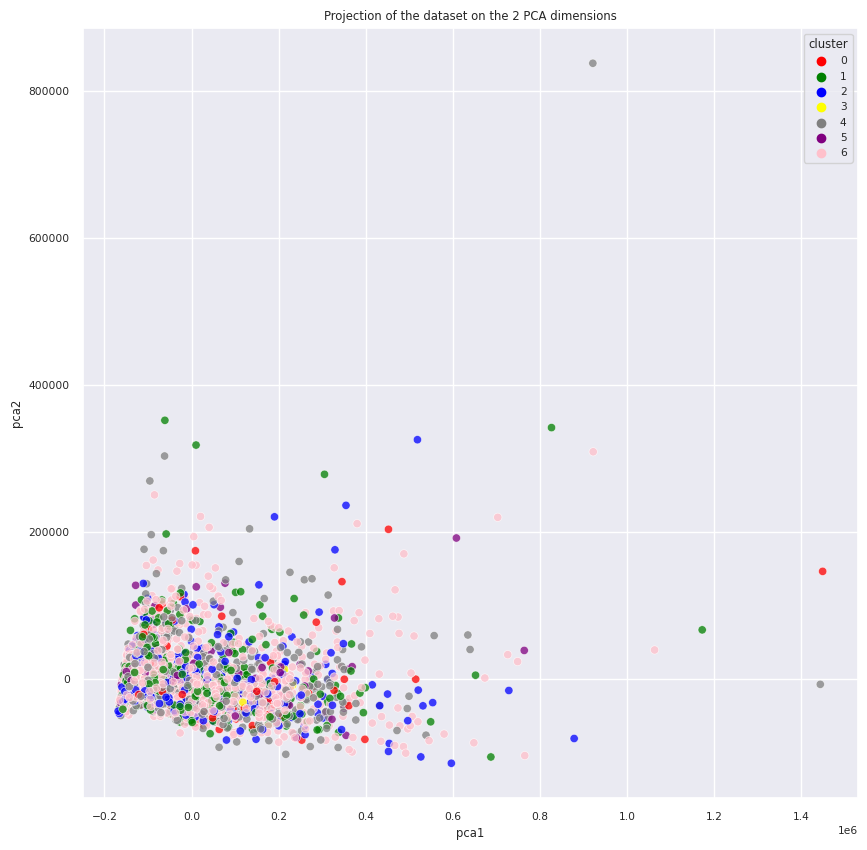

In [378]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue','yellow','gray','purple','pink'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

In [379]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[ 1.43911675e-02, -2.70481350e-08, -6.53470881e-07,
        -4.19765218e-06,  1.87388735e-01, -4.84539442e-08,
        -7.62065177e-08, -7.24860105e-07, -5.29361868e-07,
        -1.85786384e-06,  1.88688215e-06, -2.98145564e-07,
        -2.02308008e-08,  1.39310927e-08, -4.69933913e-09,
        -4.82856295e-04,  9.70068791e-01,  5.88991567e-07,
         1.80694981e-06,  1.01786730e-01, -5.82067636e-07,
         8.12182097e-02,  1.08038100e-06,  2.02268454e-06,
         2.67730005e-06,  2.79124988e-06,  8.17784976e-02,
        -2.35060957e-09,  6.86950270e-05, -2.36739123e-07],
       [ 6.84613027e-02, -4.43911140e-08, -9.21660897e-07,
         4.44088601e-06,  8.96733105e-01,  5.62301769e-07,
        -3.26299225e-08, -2.49621401e-07, -1.95012103e-06,
         4.03277597e-06, -2.28703830e-05,  2.39110960e-07,
        -4.17454396e-09, -1.20078385e-07,  3.84819731e-09,
         3.92401367e-06, -2.19380684e-01,  1.35342504e-06,
         5.58156150e-06,  2.73490334e-01,  3.59330132e-

In [380]:
# % of the total variance explained by each principal component. 
pca.explained_variance_ratio_

array([0.84841435, 0.07159996])

In [381]:
print(f'PCA is able to explain {round(pca.explained_variance_ratio_.sum()*100,0)}% of the total variance from the encoder output')

PCA is able to explain 92.0% of the total variance from the encoder output


## Apply K-Means to balanced dataset

In [382]:
wcss_values_autoencoder = []
for i in range(1,20):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1, n_init="auto")
  kmeans.fit(df1)
  wcss_values_autoencoder.append(kmeans.inertia_)

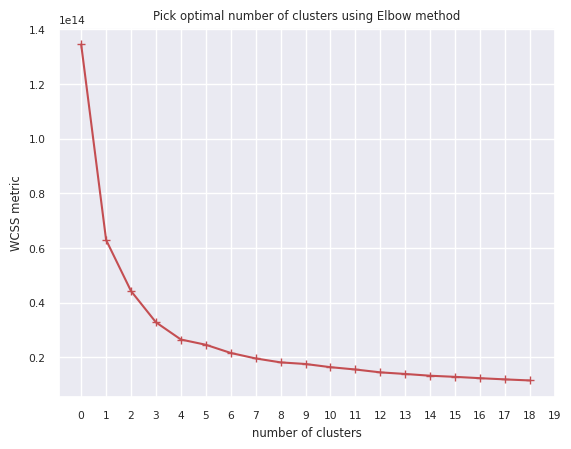

In [383]:
plt.plot(wcss_values_autoencoder, 'r+-')
plt.xlabel('number of clusters')
plt.ylabel('WCSS metric')
plt.title('Pick optimal number of clusters using Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

In [384]:
## use 6 clusters
kmeans= KMeans(n_clusters=6, init='k-means++', random_state=1, n_init="auto")
kmeans.fit(df1)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

In [385]:
print(centroids.shape)
print(clusters.shape)

(6, 30)
(4000,)


In [386]:
set(clusters)

{0, 1, 2, 3, 4, 5}

In [387]:
df1.reset_index(inplace=True, drop=True)
df_with_labels = pd.concat([df1, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels.head()
     

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,cluster
0,19000.0,0.1149,1,0,96010.0,0,0,0,1,33,...,12700.0,1.0,0.0,3.0,3.0,8744.0,0.0,0.0,0.0,4
1,10000.0,0.1139,1,3,46000.0,1,0,3,6,4,...,12100.0,0.0,3.0,0.0,6.0,13407.0,0.0,0.0,1.0,4
2,5200.0,0.2149,3,2,33361.0,1,0,2,3,1,...,17600.0,2.0,0.0,3.0,9.0,1922.0,0.0,0.0,1.0,1
3,15000.0,0.1499,2,0,120000.0,1,0,2,3,4,...,56300.0,6.0,0.0,6.0,6.0,13176.0,0.0,0.0,0.0,4
4,16000.0,0.1699,3,0,180000.0,2,0,2,3,4,...,52300.0,0.0,0.0,5.0,10.0,1857.0,0.0,0.0,1.0,1


In [388]:
print('Number of samples in:')
for cluster, df_cluster in df_with_labels.groupby('cluster'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster 0 -> 170
cluster 1 -> 2158
cluster 2 -> 533
cluster 3 -> 13
cluster 4 -> 976
cluster 5 -> 150


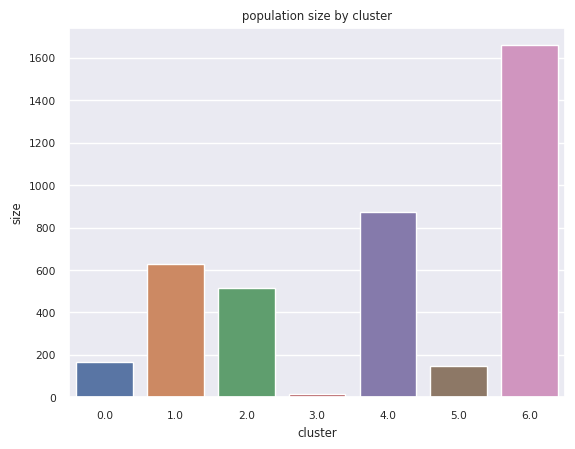

In [389]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

## Apply PCA to balanced dataset

In [390]:
pca1 = PCA(2)
principal_components1 = pca1.fit_transform(df1)
pca1_df = pd.DataFrame(principal_components1,columns=['pca_1', 'pca_2'])
pca1_df.head()

,pca_1,pca_2
0,-18952.437633,5765.118496
1,-12466.226178,-43599.422600
2,-135675.884651,-24494.770199
3,109358.462106,22134.687404
4,-95365.557970,112956.506093


In [391]:
pca1_df = pd.concat([pca1_df, pd.DataFrame({'cluster':clusters})], axis=1)
pca1_df.head()

,pca_1,pca_2,cluster
0,-18952.437633,5765.118496,4
1,-12466.226178,-43599.422600,4
2,-135675.884651,-24494.770199,1
3,109358.462106,22134.687404,4
4,-95365.557970,112956.506093,1


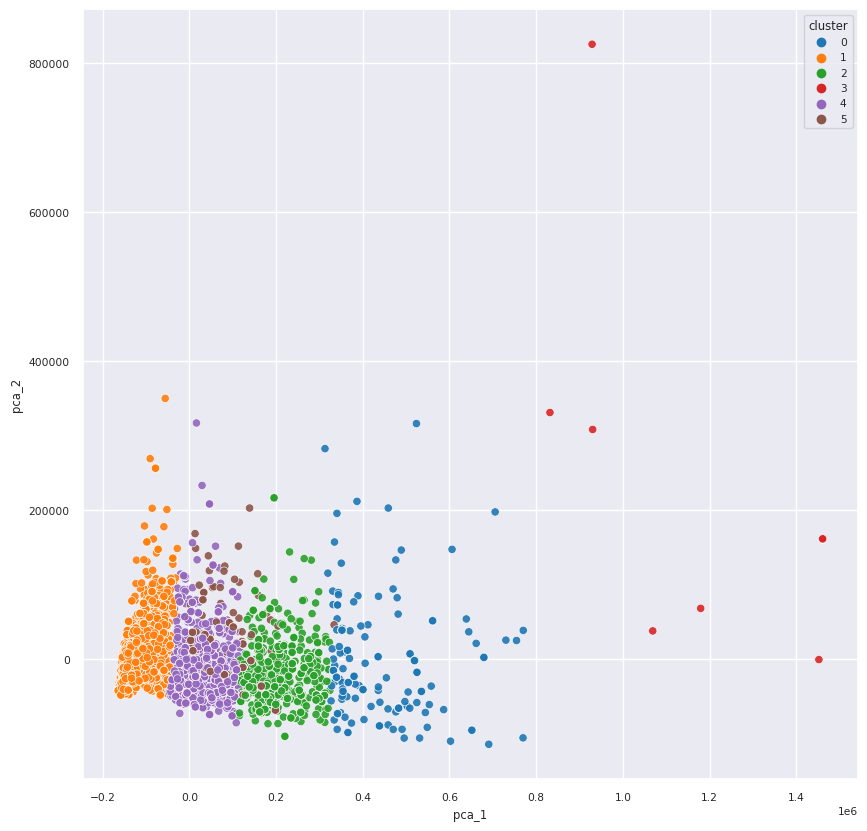

In [392]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1', y='pca_2', data=pca1_df, hue='cluster', palette='tab10', alpha=0.9)  # or 'Spectral' color palette
plt.show()

In [393]:
pca1.explained_variance_ratio_

array([0.85682949, 0.06571001])

In [394]:
print(f'PCA is able to explain {round(pca1.explained_variance_ratio_.sum()*100,0)}% of the total variance from the encoder output')

PCA is able to explain 92.0% of the total variance from the encoder output
